ABISHEK N
CS22B1092

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
matches_df = pd.read_csv('ipl_2024_matches.csv')
deliveries_df = pd.read_csv('ipl_2024_deliveries.csv')

new_df = matches_df[['match_id','city', 'team1', 'team2', 'innings1_score', 'innings1_wickets', 'innings2_score', 'innings2_wickets', 'winning_team']].copy()
new_df = new_df.dropna(subset=['innings2_score'])

new_df.loc[:, 'winning_team'] = new_df.apply(lambda row: 1 if row['winning_team'] == row['team1'] else 2, axis=1)

print("\nComplete DataFrame:")
print(new_df)



Complete DataFrame:
    match_id       city team1 team2  innings1_score  innings1_wickets  \
0     202401    Chennai   RCB   CSK           173.0               6.0   
1     202402     Mohali    DC  PBKS           174.0               9.0   
2     202403    Kolkata   KKR   SRH           208.0               7.0   
3     202404     Jaipur    RR   LSG           193.0               4.0   
4     202405  Ahmedabad    GT    MI           168.0               6.0   
..       ...        ...   ...   ...             ...               ...   
68    202469  Hyderabad  PBKS   SRH           214.0               5.0   
70    202471  Ahmedabad   SRH   KKR           159.0              10.0   
71    202472  Ahmedabad   RCB    RR           172.0               8.0   
72    202473    Chennai   SRH    RR           175.0               9.0   
73    202474    Chennai   SRH   KKR           113.0              10.0   

    innings2_score  innings2_wickets winning_team  
0            176.0               4.0            2 

In [ ]:
rows = []

for index, match_row in matches_df.iterrows():
    match_id = match_row['match_id']
    team_1 = match_row['team1']
    team_2 = match_row['team2']
    venue = match_row['venue']
    winning_team = match_row['winning_team']

    target = 1 if winning_team == team_1 else 2

    match_deliveries = deliveries_df[deliveries_df['match_id'] == match_id]

    cumulative_runs_innings_1 = 0
    cumulative_wickets_innings_1 = 0
    cumulative_runs_innings_2 = 0
    cumulative_wickets_innings_2 = 0

    ball_counter_innings_1 = 0
    ball_counter_innings_2 = 0

    for _, delivery in match_deliveries.iterrows():
        batting_team = delivery['batting_team']
        bowling_team = delivery['bowling_team']
        innings = delivery['innings']

        runs_scored = delivery['runs_of_bat'] + delivery['extras']

        over = delivery['over']
        balls_bowled = int(over) * 6 + int((over - int(over)) * 10)

        if innings == 1:
            ball_counter_innings_1 += 1
            cumulative_runs_innings_1 += runs_scored
            wicket_lost = 1 if pd.notna(delivery['wicket_type']) else 0
            cumulative_wickets_innings_1 += wicket_lost
            cumulative_runs = cumulative_runs_innings_1
            cumulative_wickets = cumulative_wickets_innings_1
            ball_number = ball_counter_innings_1
        else:
            ball_counter_innings_2 += 1
            cumulative_runs_innings_2 += runs_scored
            wicket_lost = 1 if pd.notna(delivery['wicket_type']) else 0
            cumulative_wickets_innings_2 += wicket_lost
            cumulative_runs = cumulative_runs_innings_2
            cumulative_wickets = cumulative_wickets_innings_2
            ball_number = ball_counter_innings_2

        rows.append({
            'match_id': match_id,
            'team-1': team_1,
            'team-2': team_2,
            'batting_team': batting_team,
            'bowling_team': bowling_team,
            'runs_scored': cumulative_runs,
            'wickets_lost': cumulative_wickets,
            'extras': delivery['extras'],
            'ball_number': ball_number,
            'venue': venue,
            'target': target,
            'winning_team' : winning_team,
            'innings' : innings

        })

df = pd.DataFrame(rows)

print(df.to_string())

       match_id team-1 team-2 batting_team bowling_team  runs_scored  wickets_lost  extras  ball_number                                                                  venue  target winning_team  innings
0        202401    RCB    CSK          RCB          CSK            1             0       1            1                               MA Chidambaram Stadium, Chepauk, Chennai       2          CSK        1
1        202401    RCB    CSK          RCB          CSK            2             0       0            2                               MA Chidambaram Stadium, Chepauk, Chennai       2          CSK        1
2        202401    RCB    CSK          RCB          CSK            2             0       0            3                               MA Chidambaram Stadium, Chepauk, Chennai       2          CSK        1
3        202401    RCB    CSK          RCB          CSK            2             0       0            4                               MA Chidambaram Stadium, Chepauk, Chennai      

In [ ]:
#print(df['ball_number'].max())

target_1_count = new_df['winning_team'].value_counts()[1]
target_2_count = new_df['winning_team'].value_counts()[2]
print(f"Number of times winning_team == 1: {target_1_count}")
print(f"Number of times winning_team == 2: {target_2_count}")

total_matches = len(df['match_id'].unique())
print(total_matches)

prob_winning_team_1 = target_1_count / total_matches

prob_winning_team_2 = target_2_count / total_matches

print(f"Probability of team batting first winning (winning_team == 1): {prob_winning_team_1}")
print(f"Probability of team batting second winning (winning_team == 2): {prob_winning_team_2}")

city_groups = new_df.groupby('city')
print()

for city, group in city_groups:

    target_1_count = group['winning_team'].value_counts().get(1, 0)  # Get count for winning_team == 1, default to 0 if not found
    target_2_count = group['winning_team'].value_counts().get(2, 0)  # Get count for winning_team == 2, default to 0 if not found

    print(f"City: {city}")
    print(f"Number of times winning_team == 1 (team batting first wins): {target_1_count}")
    print(f"Number of times winning_team == 2 (team batting second wins): {target_2_count}")

    total_matches = len(group['match_id'].unique())
    print(f"Total matches in {city}: {total_matches}")

    # Avoid division by zero error and handle cases where a team hasn't won in a city
    prob_winning_team_1 = target_1_count / total_matches if total_matches > 0 else 0
    prob_winning_team_2 = target_2_count / total_matches if total_matches > 0 else 0

    print(f"Probability of team batting first winning (winning_team == 1) in {city}: {prob_winning_team_1:.2f}")
    print(f"Probability of team batting second winning (winning_team == 2) in {city}: {prob_winning_team_2:.2f}")
    print()


Number of times winning_team == 1: 35
Number of times winning_team == 2: 36
71
Probability of team batting first winning (winning_team == 1): 0.49295774647887325
Probability of team batting second winning (winning_team == 2): 0.5070422535211268

City: Ahmedabad
Number of times winning_team == 1 (team batting first wins): 2
Number of times winning_team == 2 (team batting second wins): 6
Total matches in Ahmedabad: 8
Probability of team batting first winning (winning_team == 1) in Ahmedabad: 0.25
Probability of team batting second winning (winning_team == 2) in Ahmedabad: 0.75

City: Bengaluru
Number of times winning_team == 1 (team batting first wins): 4
Number of times winning_team == 2 (team batting second wins): 3
Total matches in Bengaluru: 7
Probability of team batting first winning (winning_team == 1) in Bengaluru: 0.57
Probability of team batting second winning (winning_team == 2) in Bengaluru: 0.43

City: Chennai
Number of times winning_team == 1 (team batting first wins): 3
Num

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cities = [
    "Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Dharamsala", "Guwahati", "Hyderabad",
    "Jaipur", "Kolkata", "Lucknow", "Mohali", "Mumbai", "Visakhapatnam"
]
prob_team_1 = [0.25, 0.57, 0.33, 1.00, 1.00, 0.00, 0.50, 0.40, 0.43, 0.43, 0.40, 0.57, 1.00]
prob_team_2 = [0.75, 0.43, 0.67, 0.00, 0.00, 1.00, 0.50, 0.60, 0.57, 0.57, 0.60, 0.43, 0.00]
total_matches = [8, 7, 9, 5, 2, 1, 6, 5, 7, 7, 5, 7, 2]  # Total matches per city

filtered_cities = [cities[i] for i in range(len(cities)) if total_matches[i] > 4]
filtered_prob_team_1 = [prob_team_1[i] for i in range(len(cities)) if total_matches[i] > 4]
filtered_prob_team_2 = [prob_team_2[i] for i in range(len(cities)) if total_matches[i] > 4]

stadium_classification = []
for i in range(len(filtered_cities)):
    if filtered_prob_team_1[i] >= 0.6 or filtered_prob_team_2[i] >= 0.6:
        stadium_classification.append("Biased")
    else:
        stadium_classification.append("Unbiased")

plt.figure(figsize=(12, 8))

bars1 = plt.bar(filtered_cities, filtered_prob_team_1, color='lightblue', label='Team Batting First Wins')

for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, stadium_classification[i],
             va='bottom', ha='center', color='black', fontweight='bold')

plt.ylabel('Probability')
plt.xlabel('City')
plt.title('Probability of Team Batting First Wins')

plt.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

plt.savefig('plot_image.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
from collections import defaultdict

Dictionary1 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted first and won
Dictionary2 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted first and lost
Dictionary3 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted second and won
Dictionary4 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted second and lost

for _, row in df.iterrows():
    ball_number = row['ball_number']
    runs = row['runs_scored']
    wickets = row['wickets_lost']
    target = row['target']
    batting_team = row['batting_team']
    winning_team = row['winning_team']

    if target == 1:  # Team batted first
        if batting_team == winning_team:  # Team batted first and won
            Dictionary1[ball_number]['runs_scored'] += runs
            Dictionary1[ball_number]['wickets_lost'] += wickets
            Dictionary1[ball_number]['count'] += 1
        else:  # Team batted first and lost
            Dictionary2[ball_number]['runs_scored'] += runs
            Dictionary2[ball_number]['wickets_lost'] += wickets
            Dictionary2[ball_number]['count'] += 1

    elif target == 2:  # Team batted second
        if batting_team == winning_team:  # Team batted second and won
            Dictionary3[ball_number]['runs_scored'] += runs
            Dictionary3[ball_number]['wickets_lost'] += wickets
            Dictionary3[ball_number]['count'] += 1
        else:  # Team batted second and lost
            Dictionary4[ball_number]['runs_scored'] += runs
            Dictionary4[ball_number]['wickets_lost'] += wickets
            Dictionary4[ball_number]['count'] += 1

Dictionary1 = dict(Dictionary1)
Dictionary2 = dict(Dictionary2)
Dictionary3 = dict(Dictionary3)
Dictionary4 = dict(Dictionary4)

print("Dictionary1 (Team batted first and won):", Dictionary1)
print("Dictionary2 (Team batted first and lost):", Dictionary2)
print("Dictionary3 (Team batted second and won):", Dictionary3)
print("Dictionary4 (Team batted second and lost):", Dictionary4)


Dictionary1 (Team batted first and won): {1: {'runs_scored': 47, 'wickets_lost': 0, 'count': 35}, 2: {'runs_scored': 87, 'wickets_lost': 0, 'count': 35}, 3: {'runs_scored': 140, 'wickets_lost': 2, 'count': 35}, 4: {'runs_scored': 179, 'wickets_lost': 3, 'count': 35}, 5: {'runs_scored': 230, 'wickets_lost': 5, 'count': 35}, 6: {'runs_scored': 276, 'wickets_lost': 6, 'count': 35}, 7: {'runs_scored': 303, 'wickets_lost': 7, 'count': 35}, 8: {'runs_scored': 374, 'wickets_lost': 7, 'count': 35}, 9: {'runs_scored': 422, 'wickets_lost': 7, 'count': 35}, 10: {'runs_scored': 456, 'wickets_lost': 7, 'count': 35}, 11: {'runs_scored': 510, 'wickets_lost': 9, 'count': 35}, 12: {'runs_scored': 590, 'wickets_lost': 10, 'count': 35}, 13: {'runs_scored': 655, 'wickets_lost': 12, 'count': 35}, 14: {'runs_scored': 713, 'wickets_lost': 16, 'count': 35}, 15: {'runs_scored': 770, 'wickets_lost': 16, 'count': 35}, 16: {'runs_scored': 836, 'wickets_lost': 17, 'count': 35}, 17: {'runs_scored': 910, 'wickets_lo

In [ ]:
for dictionary in [Dictionary1, Dictionary2, Dictionary3, Dictionary4]:
    for ball_number, data in dictionary.items():
        if data['count'] > 0:
            data['runs_scored'] /= data['count']
            data['wickets_lost'] /= data['count']

print("Dictionary1 (Team batted first and won):", Dictionary1)
print("Dictionary2 (Team batted first and lost):", Dictionary2)
print("\n")
print("Dictionary3 (Team batted second and won):", Dictionary3)
print("Dictionary4 (Team batted second and lost):", Dictionary4)

Dictionary1 (Team batted first and won): {1: {'runs_scored': 1.3428571428571427, 'wickets_lost': 0.0, 'count': 35}, 2: {'runs_scored': 2.4857142857142858, 'wickets_lost': 0.0, 'count': 35}, 3: {'runs_scored': 4.0, 'wickets_lost': 0.05714285714285714, 'count': 35}, 4: {'runs_scored': 5.114285714285714, 'wickets_lost': 0.08571428571428572, 'count': 35}, 5: {'runs_scored': 6.571428571428571, 'wickets_lost': 0.14285714285714285, 'count': 35}, 6: {'runs_scored': 7.885714285714286, 'wickets_lost': 0.17142857142857143, 'count': 35}, 7: {'runs_scored': 8.657142857142857, 'wickets_lost': 0.2, 'count': 35}, 8: {'runs_scored': 10.685714285714285, 'wickets_lost': 0.2, 'count': 35}, 9: {'runs_scored': 12.057142857142857, 'wickets_lost': 0.2, 'count': 35}, 10: {'runs_scored': 13.028571428571428, 'wickets_lost': 0.2, 'count': 35}, 11: {'runs_scored': 14.571428571428571, 'wickets_lost': 0.2571428571428571, 'count': 35}, 12: {'runs_scored': 16.857142857142858, 'wickets_lost': 0.2857142857142857, 'count

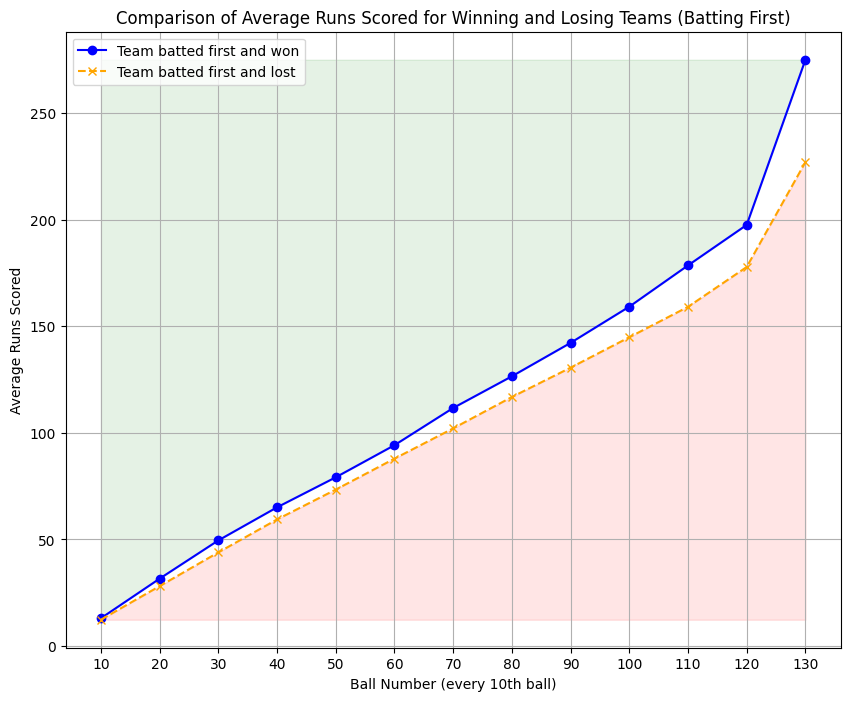

In [ ]:
import matplotlib.pyplot as plt

ball_numbers_1 = sorted([k for k in Dictionary1 if k % 10 == 0])
runs_scored_1 = [Dictionary1[k]['runs_scored'] for k in ball_numbers_1]
ball_numbers_2 = sorted([k for k in Dictionary2 if k % 10 == 0])
runs_scored_2 = [Dictionary2[k]['runs_scored'] for k in ball_numbers_2]

plt.figure(figsize=(10, 8))
plt.plot(ball_numbers_1, runs_scored_1, marker='o', linestyle='-', label='Team batted first and won', color='blue')
plt.plot(ball_numbers_2, runs_scored_2, marker='x', linestyle='--', label='Team batted first and lost', color='orange')

plt.fill_between(ball_numbers_1, runs_scored_1, max(runs_scored_1), color='green', alpha=0.1)
plt.fill_between(ball_numbers_2, runs_scored_2, min(runs_scored_2), color='red', alpha=0.1)

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Runs Scored')
plt.title('Comparison of Average Runs Scored for Winning and Losing Teams (Batting First)')
plt.legend()
plt.grid(True)
plt.xticks(ball_numbers_1)

plt.show()



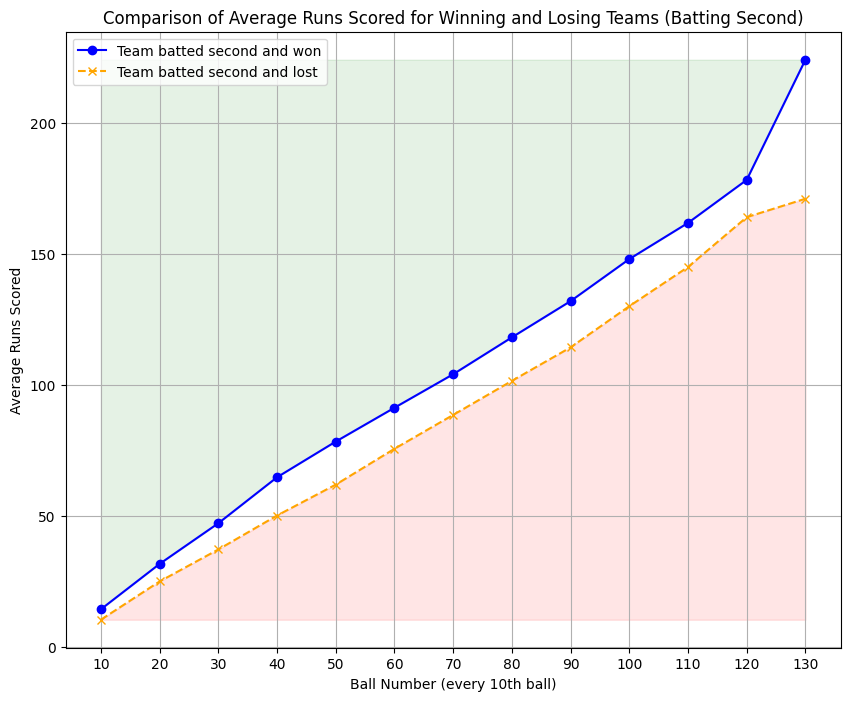

In [ ]:
import matplotlib.pyplot as plt

ball_numbers_1 = sorted([k for k in Dictionary1 if k % 10 == 0])
runs_scored_1 = [Dictionary3[k]['runs_scored'] for k in ball_numbers_1]
ball_numbers_2 = sorted([k for k in Dictionary2 if k % 10 == 0])
runs_scored_2 = [Dictionary4[k]['runs_scored'] for k in ball_numbers_2]

plt.figure(figsize=(10, 8))
plt.plot(ball_numbers_1, runs_scored_1, marker='o', linestyle='-', label='Team batted second and won', color='blue')
plt.plot(ball_numbers_2, runs_scored_2, marker='x', linestyle='--', label='Team batted second and lost', color='orange')

plt.fill_between(ball_numbers_1, runs_scored_1, max(runs_scored_1), color='green', alpha=0.1)
plt.fill_between(ball_numbers_2, runs_scored_2, min(runs_scored_2), color='red', alpha=0.1)

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Runs Scored')
plt.title('Comparison of Average Runs Scored for Winning and Losing Teams (Batting Second)')
plt.legend()
plt.grid(True)
plt.xticks(ball_numbers_1)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract data for plotting
ball_numbers_1 = sorted([k for k in Dictionary1 if k % 10 == 0])
wickets_lost_1 = [Dictionary1[k]['wickets_lost'] for k in ball_numbers_1]
ball_numbers_2 = sorted([k for k in Dictionary2 if k % 10 == 0])
wickets_lost_2 = [Dictionary2[k]['wickets_lost'] for k in ball_numbers_2]

plt.figure(figsize=(10, 8))
plt.plot(ball_numbers_1, wickets_lost_1, marker='o', linestyle='-', label='Team batted first and won', color='blue')
plt.plot(ball_numbers_2, wickets_lost_2, marker='x', linestyle='--', label='Team batted first and lost', color='orange')

plt.fill_between(ball_numbers_2, wickets_lost_2, max(wickets_lost_2), color='red', alpha=0.1)
plt.fill_between(ball_numbers_1, wickets_lost_1, min(wickets_lost_1), color='green', alpha=0.1)

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Wickets Lost')
plt.title('Comparison of Average Wickets Lost for Winning and Losing Teams (Batting First)')
plt.legend()
plt.grid(True)
plt.xticks(ball_numbers_1)

plt.show()


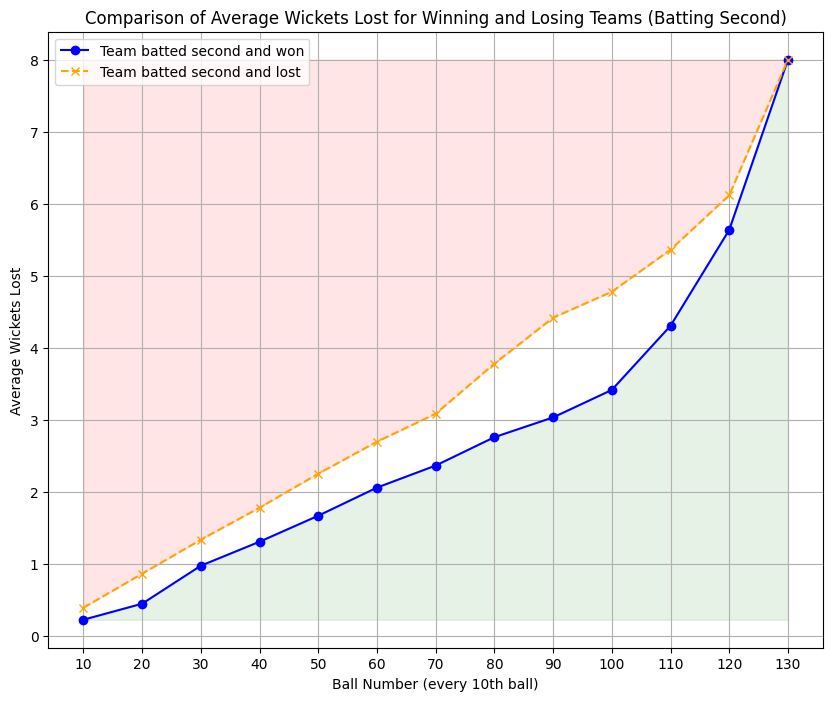

In [ ]:
import matplotlib.pyplot as plt

ball_numbers_1 = sorted([k for k in Dictionary1 if k % 10 == 0])
wickets_lost_1 = [Dictionary3[k]['wickets_lost'] for k in ball_numbers_1]
ball_numbers_2 = sorted([k for k in Dictionary2 if k % 10 == 0])
wickets_lost_2 = [Dictionary4[k]['wickets_lost'] for k in ball_numbers_2]

plt.figure(figsize=(10, 8))
plt.plot(ball_numbers_1, wickets_lost_1, marker='o', linestyle='-', label='Team batted second and won', color='blue')
plt.plot(ball_numbers_2, wickets_lost_2, marker='x', linestyle='--', label='Team batted second and lost', color='orange')

plt.fill_between(ball_numbers_2, wickets_lost_2, max(wickets_lost_2), color='red', alpha=0.1)
plt.fill_between(ball_numbers_1, wickets_lost_1, min(wickets_lost_1), color='green', alpha=0.1)

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Wickets Lost')
plt.title('Comparison of Average Wickets Lost for Winning and Losing Teams (Batting Second)')
plt.legend()
plt.grid(True)
plt.xticks(ball_numbers_1)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (13642, 13)
Testing set shape: (3411, 13)


In [ ]:
from collections import defaultdict
from collections import OrderedDict

Dictionary1 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted first and won
Dictionary2 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted first and lost
Dictionary3 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted second and won
Dictionary4 = defaultdict(lambda: {'runs_scored': 0, 'wickets_lost': 0, 'count': 0})  # Team batted second and lost

for _, row in train_df.iterrows():
    ball_number = row['ball_number']
    runs = row['runs_scored']
    wickets = row['wickets_lost']
    target = row['target']
    batting_team = row['batting_team']
    winning_team = row['winning_team']

    if target == 1:  # Team batted first
        if batting_team == winning_team:  # Team batted first and won
            Dictionary1[ball_number]['runs_scored'] += runs
            Dictionary1[ball_number]['wickets_lost'] += wickets
            Dictionary1[ball_number]['count'] += 1
        else:  # Team batted first and lost
            Dictionary2[ball_number]['runs_scored'] += runs
            Dictionary2[ball_number]['wickets_lost'] += wickets
            Dictionary2[ball_number]['count'] += 1

    elif target == 2:  # Team batted second
        if batting_team == winning_team:  # Team batted second and won
            Dictionary3[ball_number]['runs_scored'] += runs
            Dictionary3[ball_number]['wickets_lost'] += wickets
            Dictionary3[ball_number]['count'] += 1
        else:  # Team batted second and lost
            Dictionary4[ball_number]['runs_scored'] += runs
            Dictionary4[ball_number]['wickets_lost'] += wickets
            Dictionary4[ball_number]['count'] += 1

Dictionary1 = dict(Dictionary1)
Dictionary2 = dict(Dictionary2)
Dictionary3 = dict(Dictionary3)
Dictionary4 = dict(Dictionary4)

Dictionary1 = OrderedDict(sorted(Dictionary1.items()))
Dictionary2 = OrderedDict(sorted(Dictionary2.items()))
Dictionary3 = OrderedDict(sorted(Dictionary3.items()))
Dictionary4 = OrderedDict(sorted(Dictionary4.items()))

# Display the ordered dictionaries
print("Dictionary1 (Team batted first and won):", Dictionary1)
print("Dictionary2 (Team batted first and lost):", Dictionary2)
print("Dictionary3 (Team batted second and won):", Dictionary3)
print("Dictionary4 (Team batted second and lost):", Dictionary4)

Dictionary1 (Team batted first and won): OrderedDict([(1, {'runs_scored': 32, 'wickets_lost': 0, 'count': 25}), (2, {'runs_scored': 60, 'wickets_lost': 0, 'count': 24}), (3, {'runs_scored': 100, 'wickets_lost': 1, 'count': 26}), (4, {'runs_scored': 130, 'wickets_lost': 2, 'count': 27}), (5, {'runs_scored': 174, 'wickets_lost': 3, 'count': 28}), (6, {'runs_scored': 215, 'wickets_lost': 5, 'count': 27}), (7, {'runs_scored': 248, 'wickets_lost': 5, 'count': 29}), (8, {'runs_scored': 227, 'wickets_lost': 3, 'count': 21}), (9, {'runs_scored': 297, 'wickets_lost': 6, 'count': 26}), (10, {'runs_scored': 380, 'wickets_lost': 6, 'count': 29}), (11, {'runs_scored': 477, 'wickets_lost': 9, 'count': 32}), (12, {'runs_scored': 494, 'wickets_lost': 7, 'count': 29}), (13, {'runs_scored': 509, 'wickets_lost': 12, 'count': 29}), (14, {'runs_scored': 598, 'wickets_lost': 14, 'count': 29}), (15, {'runs_scored': 620, 'wickets_lost': 10, 'count': 27}), (16, {'runs_scored': 724, 'wickets_lost': 11, 'count':

In [ ]:
for dictionary in [Dictionary1, Dictionary2, Dictionary3, Dictionary4]:
    for ball_number, data in dictionary.items():
        if data['count'] > 0:
            data['runs_scored'] /= data['count']
            data['wickets_lost'] /= data['count']

print("Dictionary1 (Team batted first and won):", Dictionary1)
print("Dictionary2 (Team batted first and lost):", Dictionary2)
print("\n")
print("Dictionary3 (Team batted second and won):", Dictionary3)
print("Dictionary4 (Team batted second and lost):", Dictionary4)

Dictionary1 (Team batted first and won): OrderedDict([(1, {'runs_scored': 1.28, 'wickets_lost': 0.0, 'count': 25}), (2, {'runs_scored': 2.5, 'wickets_lost': 0.0, 'count': 24}), (3, {'runs_scored': 3.8461538461538463, 'wickets_lost': 0.038461538461538464, 'count': 26}), (4, {'runs_scored': 4.814814814814815, 'wickets_lost': 0.07407407407407407, 'count': 27}), (5, {'runs_scored': 6.214285714285714, 'wickets_lost': 0.10714285714285714, 'count': 28}), (6, {'runs_scored': 7.962962962962963, 'wickets_lost': 0.18518518518518517, 'count': 27}), (7, {'runs_scored': 8.551724137931034, 'wickets_lost': 0.1724137931034483, 'count': 29}), (8, {'runs_scored': 10.80952380952381, 'wickets_lost': 0.14285714285714285, 'count': 21}), (9, {'runs_scored': 11.423076923076923, 'wickets_lost': 0.23076923076923078, 'count': 26}), (10, {'runs_scored': 13.10344827586207, 'wickets_lost': 0.20689655172413793, 'count': 29}), (11, {'runs_scored': 14.90625, 'wickets_lost': 0.28125, 'count': 32}), (12, {'runs_scored': 

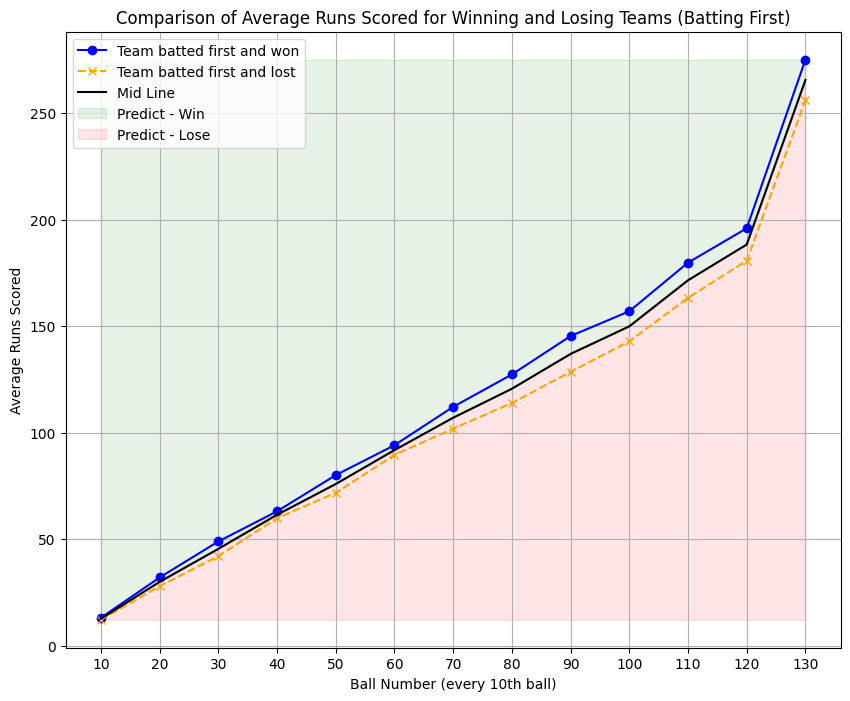

In [ ]:
import matplotlib.pyplot as plt

common_ball_numbers = sorted([k for k in Dictionary1 if k in Dictionary2 and k % 10 == 0])
runs_scored_1 = [Dictionary1[k]['runs_scored'] for k in common_ball_numbers]
runs_scored_2 = [Dictionary2[k]['runs_scored'] for k in common_ball_numbers]

mid_line = [
    runs2 + (runs1 - runs2) / 2
    for runs1, runs2 in zip(runs_scored_1, runs_scored_2)
]

plt.figure(figsize=(10, 8))

plt.plot(common_ball_numbers, runs_scored_1, marker='o', linestyle='-', label='Team batted first and won', color='blue')
plt.plot(common_ball_numbers, runs_scored_2, marker='x', linestyle='--', label='Team batted first and lost', color='orange')

plt.plot(common_ball_numbers, mid_line, color='black', linestyle='-', label='Mid Line')

plt.fill_between(common_ball_numbers, mid_line, max(runs_scored_1 + runs_scored_2), color='green', alpha=0.1, label='Predict - Win')
plt.fill_between(common_ball_numbers, min(runs_scored_1 + runs_scored_2), mid_line, color='red', alpha=0.1, label='Predict - Lose')

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Runs Scored')
plt.title('Comparison of Average Runs Scored for Winning and Losing Teams (Batting First)')
plt.legend()
plt.grid(True)
plt.xticks(common_ball_numbers)

plt.show()

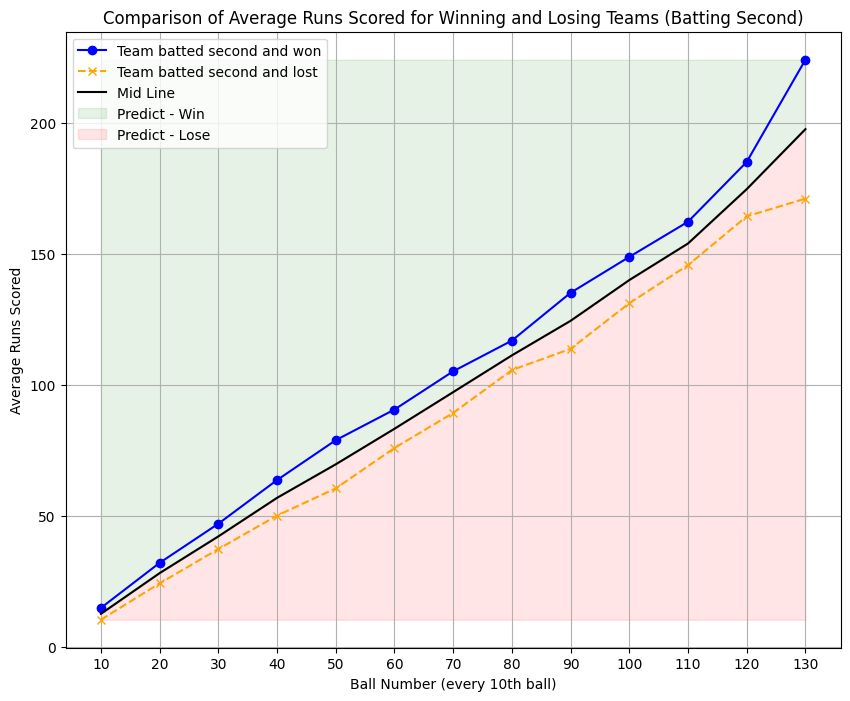

In [ ]:
import matplotlib.pyplot as plt

common_ball_numbers = sorted([k for k in Dictionary3 if k in Dictionary4 and k % 10 == 0])
runs_scored_1 = [Dictionary3[k]['runs_scored'] for k in common_ball_numbers]
runs_scored_2 = [Dictionary4[k]['runs_scored'] for k in common_ball_numbers]

mid_line = [
    runs2 + (runs1 - runs2) / 2
    for runs1, runs2 in zip(runs_scored_1, runs_scored_2)
]

plt.figure(figsize=(10, 8))

plt.plot(common_ball_numbers, runs_scored_1, marker='o', linestyle='-', label='Team batted second and won', color='blue')
plt.plot(common_ball_numbers, runs_scored_2, marker='x', linestyle='--', label='Team batted second and lost', color='orange')

plt.plot(common_ball_numbers, mid_line, color='black', linestyle='-', label='Mid Line')

plt.fill_between(common_ball_numbers, mid_line, max(runs_scored_1 + runs_scored_2), color='green', alpha=0.1, label='Predict - Win')
plt.fill_between(common_ball_numbers, min(runs_scored_1 + runs_scored_2), mid_line, color='red', alpha=0.1, label='Predict - Lose')

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Runs Scored')
plt.title('Comparison of Average Runs Scored for Winning and Losing Teams (Batting Second)')
plt.legend()
plt.grid(True)
plt.xticks(common_ball_numbers)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

common_ball_numbers = sorted([k for k in Dictionary1 if k in Dictionary2 and k % 10 == 0])
wickets_lost_1 = [Dictionary1[k]['wickets_lost'] for k in common_ball_numbers]
wickets_lost_2 = [Dictionary2[k]['wickets_lost'] for k in common_ball_numbers]

mid_line = [
    wickets2 + (wickets1 - wickets2) / 2
    for wickets1, wickets2 in zip(wickets_lost_1, wickets_lost_2)
]

plt.figure(figsize=(10, 8))

plt.plot(common_ball_numbers, wickets_lost_1, marker='o', linestyle='-', label='Team batted first and won', color='blue')
plt.plot(common_ball_numbers, wickets_lost_2, marker='x', linestyle='--', label='Team batted first and lost', color='orange')

plt.plot(common_ball_numbers, mid_line, color='black', linestyle='-', label='Mid Line')

plt.fill_between(common_ball_numbers, mid_line, max(wickets_lost_1 + wickets_lost_2), color='red', alpha=0.1, label='Predict - Win')
plt.fill_between(common_ball_numbers, min(wickets_lost_1 + wickets_lost_2), mid_line, color='green', alpha=0.1, label='Predict - Lose')

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Wickets Lost')
plt.title('Comparison of Average Wickets Lost for Winning and Losing Teams (Batting First)')
plt.legend()
plt.grid(True)
plt.xticks(common_ball_numbers)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

common_ball_numbers = sorted([k for k in Dictionary3 if k in Dictionary4 and k % 10 == 0])
wickets_lost_1 = [Dictionary3[k]['wickets_lost'] for k in common_ball_numbers]
wickets_lost_2 = [Dictionary4[k]['wickets_lost'] for k in common_ball_numbers]

mid_line = [
    wickets2 + (wickets1 - wickets2) / 2
    for wickets1, wickets2 in zip(wickets_lost_1, wickets_lost_2)
]

plt.figure(figsize=(10, 8))

plt.plot(common_ball_numbers, wickets_lost_1, marker='o', linestyle='-', label='Team batted second and won', color='blue')
plt.plot(common_ball_numbers, wickets_lost_2, marker='x', linestyle='--', label='Team batted second and lost', color='orange')

plt.plot(common_ball_numbers, mid_line, color='black', linestyle='-', label='Mid Line')

plt.fill_between(common_ball_numbers, mid_line, max(wickets_lost_1 + wickets_lost_2), color='red', alpha=0.1, label='Predict - Win')
plt.fill_between(common_ball_numbers, min(wickets_lost_1 + wickets_lost_2), mid_line, color='green', alpha=0.1, label='Predict - Lose')

plt.xlabel('Ball Number (every 10th ball)')
plt.ylabel('Average Wickets Lost')
plt.title('Comparison of Average Wickets Lost for Winning and Losing Teams (Batting Second)')
plt.legend()
plt.grid(True)
plt.xticks(common_ball_numbers)

plt.show()


In [ ]:
import pandas as pd

test_df['prediction'] = None

for idx, row in test_df.iterrows():
    innings = row['target']
    balls = row['ball_number']
    runs = row['runs_scored']
    wickets = row['wickets_lost']

    if innings == 1:  # Team batted first
        # Check if the ball number exists in both dictionaries
        if balls in Dictionary1 and balls in Dictionary2:

            k = Dictionary1[balls]['runs_scored'] - Dictionary2[balls]['runs_scored']
            w = Dictionary2[balls]['wickets_lost'] - Dictionary1[balls]['wickets_lost']


            if runs > (Dictionary2[balls]['runs_scored']+k/2) and wickets < (Dictionary1[balls]['wickets_lost']+w/2):
                test_df.at[idx, 'prediction'] = 1  # Team batting first predicted to win
            elif runs < (Dictionary2[balls]['runs_scored']+k/2) and wickets > (Dictionary1[balls]['wickets_lost']+w/2):
                test_df.at[idx, 'prediction'] = 2  # Team batting second predicted to win
            elif  runs > (Dictionary2[balls]['runs_scored']+k/2):
                test_df.at[idx, 'prediction'] = 1
            elif runs < (Dictionary2[balls]['runs_scored']+k/2):
                test_df.at[idx, 'prediction'] = 1
            else:
                test_df.at[idx, 'prediction'] = 0
        else:
            test_df.at[idx, 'prediction'] = -1


    elif innings == 2:  # Team batted second
        if balls in Dictionary3 and balls in Dictionary4:

            k = Dictionary3[balls]['runs_scored'] - Dictionary4[balls]['runs_scored']
            w = Dictionary4[balls]['wickets_lost'] - Dictionary3[balls]['wickets_lost']


            if runs > (Dictionary4[balls]['runs_scored']+k/2) and wickets < (Dictionary3[balls]['wickets_lost']+w/2):
                test_df.at[idx, 'prediction'] = 2  # Team batting second predicted to win
            elif runs < (Dictionary4[balls]['runs_scored']+k/2) and wickets > (Dictionary4[balls]['wickets_lost']+w/2):
                test_df.at[idx, 'prediction'] = 1  # Team batting first predicted to win
            elif  runs > (Dictionary4[balls]['runs_scored']+k/2):
                test_df.at[idx, 'prediction'] = 2
            elif runs < (Dictionary4[balls]['runs_scored']+k/2):
                test_df.at[idx, 'prediction'] = 1
            else:
                test_df.at[idx, 'prediction'] = 0
        else:
            test_df.at[idx, 'prediction'] = -1

print(test_df[['match_id', 'target', 'ball_number', 'prediction']])

       match_id  target  ball_number prediction
10907    202445       2           60          2
2300     202410       2           57          2
9322     202439       2           90          2
3502     202415       1           67          1
720      202403       1          101          1
...         ...     ...          ...        ...
9869     202441       1           20          1
17013    202474       2           28          2
11588    202448       2           46          1
11179    202446       1          106          2
15448    202467       1           33          1

[3411 rows x 4 columns]


In [ ]:
correct_predictions = (test_df['prediction'] == test_df['target']).sum()
total_predictions = len(test_df)

accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0

print(f"Accuracy of the model: {accuracy:.2f}%")


Accuracy of the model: 57.81%


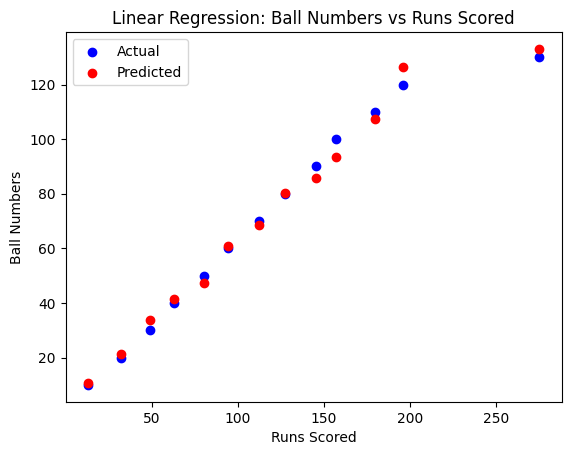

Intercept: 4.816066525196792
Coefficient for Runs Scored: 0.2216796762599247
Coefficient for Wickets Lost: 14.947516824301392


In [ ]:
# 1st innings and to Win
# How much ball it will take to Score the said Runs, Given the no. of wickets fallen by the time they take the runs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ball_numbers = sorted([k for k in Dictionary1 if k in Dictionary2 and k % 10 == 0])
runs_scored_1 = [Dictionary1[k]['runs_scored'] for k in ball_numbers]
wickets_lost_1 = [Dictionary1[k]['wickets_lost'] for k in ball_numbers]

# feature matrix (X) and target vector (y)

X = np.array(list(zip(runs_scored_1, wickets_lost_1)))
X = np.c_[np.ones(X.shape[0]), X]  # Add column of ones for intercept (Shape: n_samples, 3)

y = np.array(ball_numbers)  # Target variable

# Normal Equation
# β = (X^T X)^(-1) X^T y
X_T = X.T
beta = np.linalg.inv(X_T.dot(X)).dot(X_T).dot(y)

y_pred = X.dot(beta)

# Step 4: Visualize the results (optional)
# Scatter plot of actual vs predicted ball_numbers
plt.scatter(runs_scored_1, y, color='blue', label='Actual')
plt.scatter(runs_scored_1, y_pred, color='red', label='Predicted')
plt.xlabel('Runs Scored')
plt.ylabel('Ball Numbers')
plt.legend()
plt.title('Linear Regression: Ball Numbers vs Runs Scored')
plt.show()

# Print the coefficients (intercept and slopes)
print(f'Intercept: {beta[0]}')
print(f'Coefficient for Runs Scored: {beta[1]}')
print(f'Coefficient for Wickets Lost: {beta[2]}')



In [ ]:
def predict_ball_number(runs_scored, wickets_lost):
    input_data = np.array([1, runs_scored, wickets_lost])

    predicted_ball_number = input_data.dot(beta)
    return predicted_ball_number

runs_scored_input = int(input("Enter runs scored: "))
wickets_lost_input = int(input("Enter wickets lost: "))

if runs_scored_input>300 or wickets_lost_input>10 :
    print("Invalid input")
else:
    predicted_ball_number = predict_ball_number(runs_scored_input, wickets_lost_input)

    print(f"Predicted Ball Number for Runs Scored {runs_scored_input} and Wickets Lost {wickets_lost_input}: {predicted_ball_number}")


Enter runs scored: 125
Enter wickets lost: 3
Predicted Ball Number for Runs Scored 125 and Wickets Lost 3: 77.36857653059155


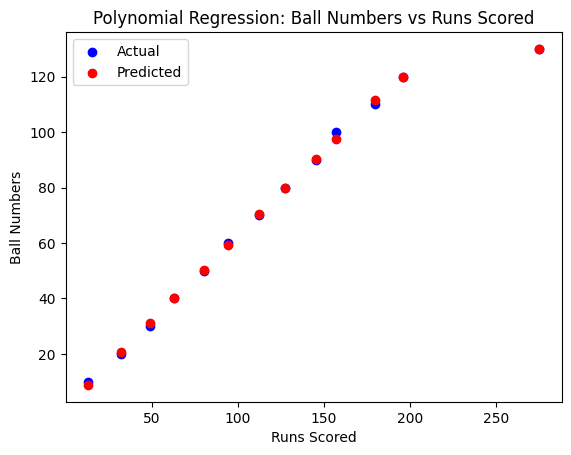

Intercept: 0.35834738061440324
Coefficient for Runs Scored: 0.6837902610760224
Coefficient for Wickets Lost: -2.033230614670353
Coefficient for Runs Scored^2: -0.004833004247667298
Coefficient for Wickets Lost^2: -7.561273786643852
Coefficient for Runs Scored * Wickets Lost: 0.37928151454436265


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(list(zip(runs_scored_1, wickets_lost_1)))
X_poly = []

for x1, x2 in X:
    # [x1, x2, x1^2, x2^2, x1*x2]
    X_poly.append([x1, x2, x1**2, x2**2, x1 * x2])

X_poly = np.array(X_poly)
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]

# Target variable
y = np.array(ball_numbers)

X_T = X_poly.T
beta = np.linalg.inv(X_T.dot(X_poly)).dot(X_T).dot(y)

y_pred = X_poly.dot(beta)

plt.scatter(runs_scored_1, y, color='blue', label='Actual')
plt.scatter(runs_scored_1, y_pred, color='red', label='Predicted')
plt.xlabel('Runs Scored')
plt.ylabel('Ball Numbers')
plt.legend()
plt.title('Polynomial Regression: Ball Numbers vs Runs Scored')
plt.show()

print(f'Intercept: {beta[0]}')
print(f'Coefficient for Runs Scored: {beta[1]}')
print(f'Coefficient for Wickets Lost: {beta[2]}')
print(f'Coefficient for Runs Scored^2: {beta[3]}')
print(f'Coefficient for Wickets Lost^2: {beta[4]}')
print(f'Coefficient for Runs Scored * Wickets Lost: {beta[5]}')


In [ ]:
def predict_ball_number(runs_scored, wickets_lost):

    input_data = np.array([
        1,  # Intercept term
        runs_scored,  # x1
        wickets_lost,  # x2
        runs_scored ** 2,  # x1^2
        wickets_lost ** 2,  # x2^2
        runs_scored * wickets_lost  # x1 * x2
    ])

    predicted_ball_number = input_data.dot(beta)
    return predicted_ball_number

runs_scored_input = int(input("Enter runs scored: "))
wickets_lost_input = int(input("Enter wickets lost: "))

if runs_scored_input > 300 or wickets_lost_input > 10:
    print("Invalid input")
else:
    predicted_ball_number = predict_ball_number(runs_scored_input, wickets_lost_input)
    print(f"Predicted Ball Number for Runs Scored {runs_scored_input} and Wickets Lost {wickets_lost_input}: {predicted_ball_number}")


Enter runs scored: 175
Enter wickets lost: 4
Predicted Ball Number for Runs Scored 175 and Wickets Lost 4: 108.39464512017815


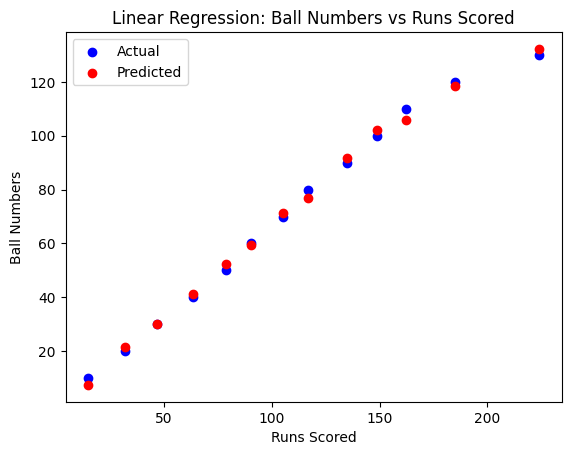

Intercept: -3.8527704036734334
Coefficient for Runs Scored: 0.8660256992131754
Coefficient for Wickets Lost: -7.242119214631772


In [ ]:
# 2nd innings and to Win
# How much ball it will take to Score the said Runs, Given the no. of wickets fallen by the time they take the runs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ball_numbers = sorted([k for k in Dictionary3 if k in Dictionary4 and k % 10 == 0])
runs_scored_1 = [Dictionary3[k]['runs_scored'] for k in ball_numbers]
wickets_lost_1 = [Dictionary3[k]['wickets_lost'] for k in ball_numbers]

# feature matrix (X) and target vector (y)

X = np.array(list(zip(runs_scored_1, wickets_lost_1)))
X = np.c_[np.ones(X.shape[0]), X]  # Add column of ones for intercept (Shape: n_samples, 3)

y = np.array(ball_numbers)  # Target variable

# Normal Equation
# β = (X^T X)^(-1) X^T y
X_T = X.T
beta = np.linalg.inv(X_T.dot(X)).dot(X_T).dot(y)

y_pred = X.dot(beta)

# Step 4: Visualize the results (optional)
# Scatter plot of actual vs predicted ball_numbers
plt.scatter(runs_scored_1, y, color='blue', label='Actual')
plt.scatter(runs_scored_1, y_pred, color='red', label='Predicted')
plt.xlabel('Runs Scored')
plt.ylabel('Ball Numbers')
plt.legend()
plt.title('Linear Regression: Ball Numbers vs Runs Scored')
plt.show()

print(f'Intercept: {beta[0]}')
print(f'Coefficient for Runs Scored: {beta[1]}')
print(f'Coefficient for Wickets Lost: {beta[2]}')


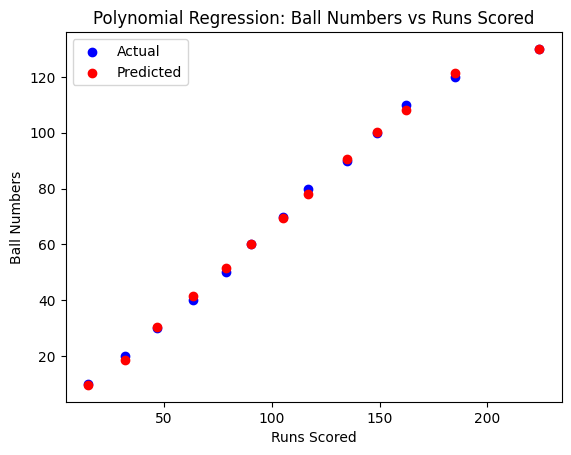

Intercept: 1.758843737636429
Coefficient for Runs Scored: 0.3991162468424774
Coefficient for Wickets Lost: 9.410063879830616
Coefficient for Runs Scored^2: 0.0015592683800129334
Coefficient for Wickets Lost^2: -0.7551433650030148
Coefficient for Runs Scored * Wickets Lost: -0.03708383927723258


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(list(zip(runs_scored_1, wickets_lost_1)))
X_poly = []

for x1, x2 in X:
    # [x1, x2, x1^2, x2^2, x1*x2]
    X_poly.append([x1, x2, x1**2, x2**2, x1 * x2])

X_poly = np.array(X_poly)
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]

# Target variable
y = np.array(ball_numbers)

X_T = X_poly.T
beta = np.linalg.inv(X_T.dot(X_poly)).dot(X_T).dot(y)

y_pred = X_poly.dot(beta)

plt.scatter(runs_scored_1, y, color='blue', label='Actual')
plt.scatter(runs_scored_1, y_pred, color='red', label='Predicted')
plt.xlabel('Runs Scored')
plt.ylabel('Ball Numbers')
plt.legend()
plt.title('Polynomial Regression: Ball Numbers vs Runs Scored')
plt.show()

print(f'Intercept: {beta[0]}')
print(f'Coefficient for Runs Scored: {beta[1]}')
print(f'Coefficient for Wickets Lost: {beta[2]}')
print(f'Coefficient for Runs Scored^2: {beta[3]}')
print(f'Coefficient for Wickets Lost^2: {beta[4]}')
print(f'Coefficient for Runs Scored * Wickets Lost: {beta[5]}')

In [ ]:
def predict_ball_number(runs_scored, wickets_lost):

    input_data = np.array([
        1,  # Intercept term
        runs_scored,  # x1
        wickets_lost,  # x2
        runs_scored ** 2,  # x1^2
        wickets_lost ** 2,  # x2^2
        runs_scored * wickets_lost  # x1 * x2
    ])

    predicted_ball_number = input_data.dot(beta)
    return predicted_ball_number

runs_scored_input = int(input("Enter runs scored: "))
wickets_lost_input = int(input("Enter wickets lost: "))

if runs_scored_input > 300 or wickets_lost_input > 10:
    print("Invalid input")
else:
    predicted_ball_number = predict_ball_number(runs_scored_input, wickets_lost_input)
    print(f"Predicted Ball Number for Runs Scored {runs_scored_input} and Wickets Lost {wickets_lost_input}: {predicted_ball_number}")

Enter runs scored: 186
Enter wickets lost: 3
Predicted Ball Number for Runs Scored 186 and Wickets Lost 3: 130.6800335630336
